In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


In [2]:
data = pd.read_csv ('/Users/nina/Downloads/9063/project/song_data.csv')
print(data.head())

                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4      

In [3]:
# check the datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [4]:
data.shape

(18835, 15)

In [5]:
data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


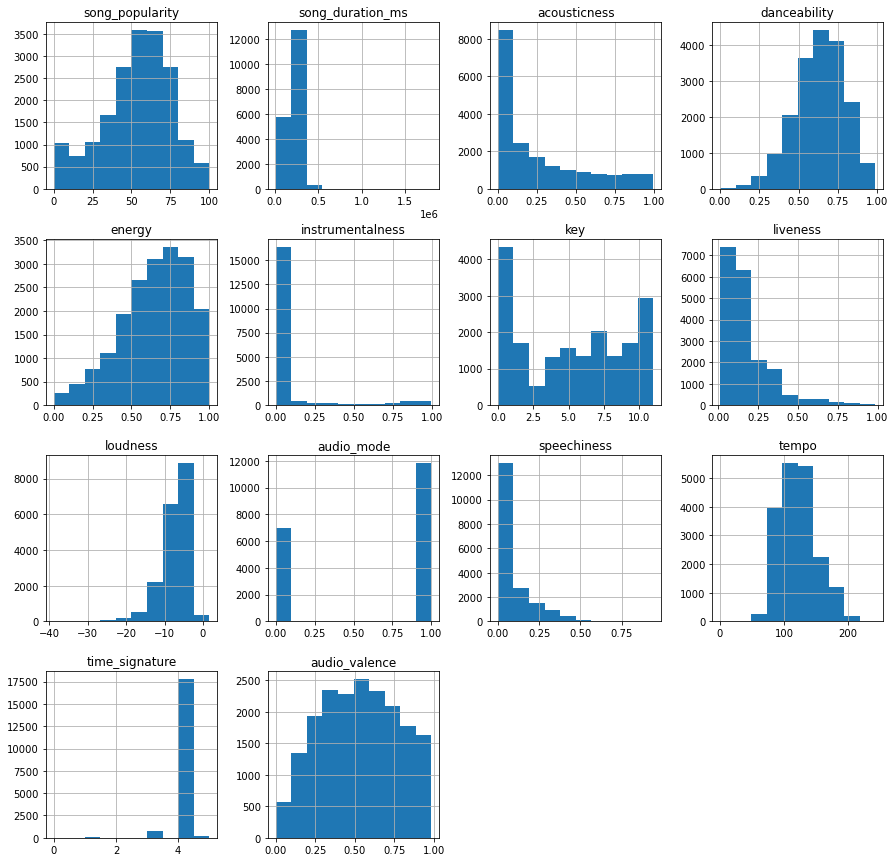

In [6]:
# sns.boxplot(x=data['song_duration_ms'])
#histograms
data.hist(figsize=(15,15))
plt.show()

In [7]:
# check null values
data.isnull().any()

song_name           False
song_popularity     False
song_duration_ms    False
acousticness        False
danceability        False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
audio_mode          False
speechiness         False
tempo               False
time_signature      False
audio_valence       False
dtype: bool

In [8]:
# print(data.duplicated().sum())
# df = data.drop_duplicates()
# print(df.shape)

In [9]:
# check dupliacte values
print(data['song_name'].is_unique)

False


In [10]:
# remove rows with duplicate song_names
# only keep one row
print(data['song_name'].duplicated().sum())
df = data.drop_duplicates(subset=['song_name'])
print(df.shape)

5765
(13070, 15)


In [11]:
df.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,-0.006965,-0.037154,0.052140,-0.012476,-0.091087,-0.000396,-0.034760,0.051184,0.000216,-0.000436,-0.026940,0.021449,-0.049775
song_duration_ms,-0.006965,1.000000,-0.121959,-0.085902,0.105677,-0.026923,-0.004156,0.023539,0.035422,-0.025588,-0.080819,0.017090,0.004168,-0.068409
acousticness,-0.037154,-0.121959,1.000000,-0.179665,-0.680703,0.186305,-0.001455,-0.089876,-0.572433,0.060194,-0.091555,-0.147054,-0.156349,-0.122776
danceability,0.052140,-0.085902,-0.179665,1.000000,0.063848,-0.127092,0.010822,-0.094310,0.181657,-0.100492,0.203907,-0.126737,0.139104,0.351737
energy,-0.012476,0.105677,-0.680703,0.063848,1.000000,-0.231004,0.016328,0.177608,0.770288,-0.048334,0.077742,0.181354,0.147634,0.312207
instrumentalness,-0.091087,-0.026923,0.186305,-0.127092,-0.231004,1.000000,-0.011115,-0.043846,-0.405287,-0.016623,-0.082353,-0.045582,-0.064888,-0.201873
key,-0.000396,-0.004156,-0.001455,0.010822,0.016328,-0.011115,1.000000,-0.003503,0.009943,-0.176612,0.027106,-0.006665,-0.012019,0.025762
liveness,-0.034760,0.023539,-0.089876,-0.094310,0.177608,-0.043846,-0.003503,1.000000,0.115486,-0.006903,0.089412,0.025983,0.011597,0.014258
loudness,0.051184,0.035422,-0.572433,0.181657,0.770288,-0.405287,0.009943,0.115486,1.000000,-0.057121,0.083615,0.142247,0.114710,0.213695
audio_mode,0.000216,-0.025588,0.060194,-0.100492,-0.048334,-0.016623,-0.176612,-0.006903,-0.057121,1.000000,-0.113466,0.024126,-0.024524,0.000384


<AxesSubplot:>

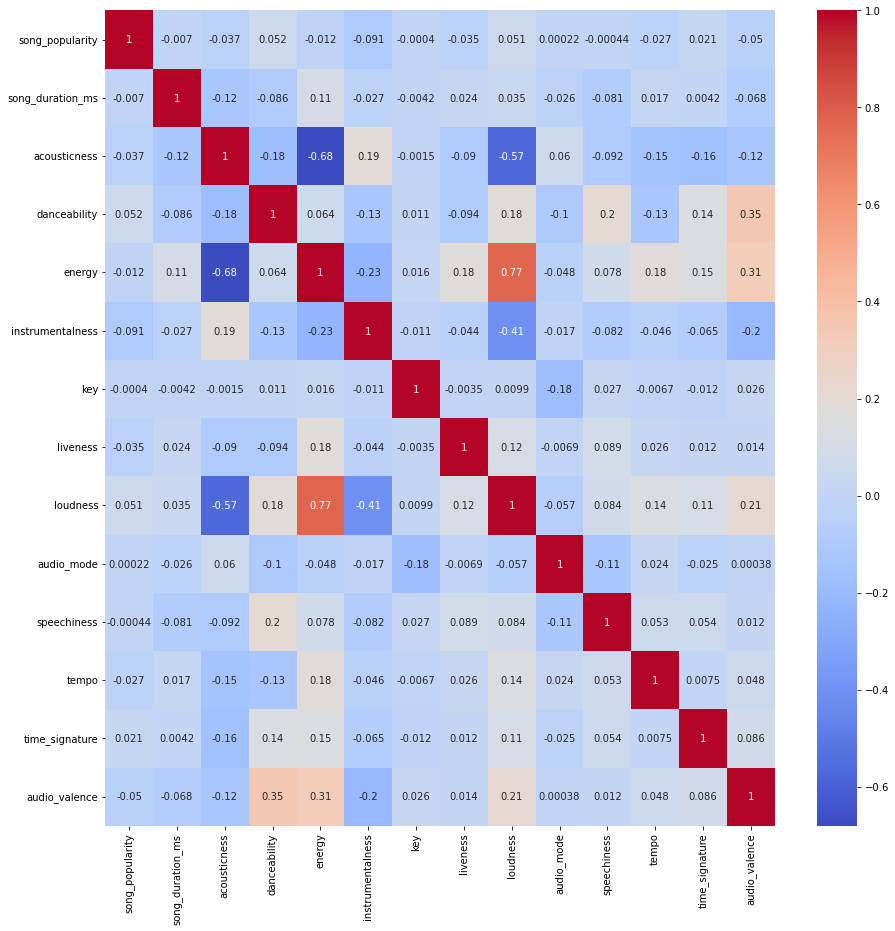

In [13]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')